<a href="https://colab.research.google.com/github/tigrannh/Data-Science-ML-projects/blob/main/Copy_of_DBSCAN_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DBSCAN Homework

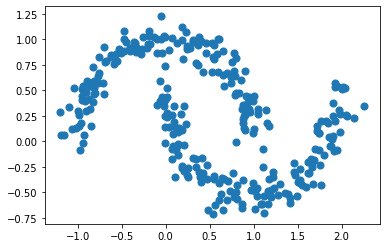

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y_true = make_moons(n_samples=300, noise = 0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.3, min_samples=25)
dbscan.fit(X)


DBSCAN(eps=0.3, min_samples=25)

In [ ]:
dbscan.labels_

array([ 0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,
        1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,
        0,  0,  0,  0, -1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,
        0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  1, -1,  0,  0,  0,  1,
        1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,
        1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,
        0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1, -1,  0,  1,  0,
        0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  1,  0,  1, -1,
        0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0, -1,  1,  0,
        1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1, -1,  0,  0,  1,  1,
        1,  1, -1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0, -1,  0,
        1,  1,  0,  1,  0

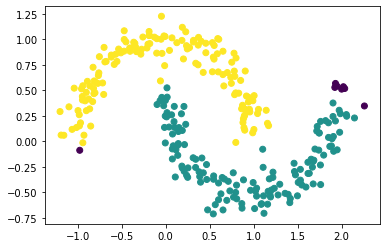

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)

## Task1: Implement DBSCAN algorithm (without using sklearn)

Breadth-first search (BFS) or Depth-first search (DFS) algorithms can be useful

In [ ]:
import numpy as np

class DBSCAN2:
  def __init__(self, min_points=5, epsilon=0.5):
    self.epsilon = epsilon
    self.min_points = min_points
    self._distances = None
    self._alreadyAdded = None
    self.clusters = None

  def highDensity(self, p, X):
    count = 0
    for i in range(len(X)):
      if self._distances[p,i] <= self.epsilon:
        count += 1
        if count >= self.min_points:
          return True
    return False

  def label(self, p, X):
    if self.highDensity(p, X):
      return 'core'

    for i in range(len(X)):
      if self.highDensity(i, X) and self._distances[p, i] <= self.epsilon:
        return 'border'

    return 'noise'

  
  def newCluster(self, p, X):
    cluster = [p]
    self._alreadyAdded[p] = True

    for i in range(len(X)):
      if self._alreadyAdded[i] == False and self._distances[p, i] <= self.epsilon:
        cluster.append(i)
        self._alreadyAdded[i] = False
        if(self.highDensity(i, X)):
          cluster.extend(self.newCluster(i, X))
    return cluster
  
  def fit(self, X):
    current_cluster = 1
    self.clusters = np.zeros(len(X))
    self._distances = np.zeros((len(X), len(X)))
    for i in range(len(X)):
      for j in range(len(X)):
        self._distances[i,j] = np.linalg.norm(X[i] - X[j])

    for i in range(len(X)):
      if(self.label(i, X) == 'noise'):
        self.clusters[i] = -1
    
    while True:
      points = np.where(self.clusters == 0)[0]
      if points.size == 0:
        break
      
      current = np.random.choice(points)
      if(self.highDensity(current, X)):
        self._alreadyAdded = [False]*len(X)
        cluster = self.newCluster(current, X)

        for i in cluster:
          self.clusters[i] = current_cluster
        current_cluster += 1


## Task2: Execute DBSCAN on the given data and find good hyperparameters to have a good clustering. Draw the resulting clusters

In [ ]:
dbscan2 = DBSCAN2(min_points=25, epsilon=0.3)
dbscan2.fit(X)

In [ ]:
dbscan2.clusters

array([ 1.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,
        1.,  2.,  2.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,
        1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1., -1.,
        2.,  1.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,
        1.,  2.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  2.,  2., -1.,  1.,
        1.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  2.,
        1.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        2.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,
        2.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,
        2.,  1.,  2.,  2.,  2.,  2., -1.,  1.,  2.,  1.,  1.,  1.,  2.,
        2.,  2.,  1.,  2.,  1.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,
       -1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  2

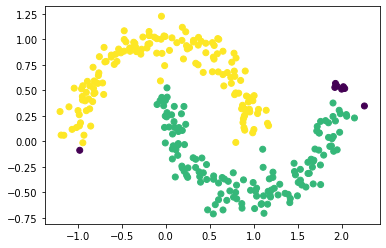

In [ ]:
plt.scatter(X[:,0], X[:,1], c=dbscan2.clusters)

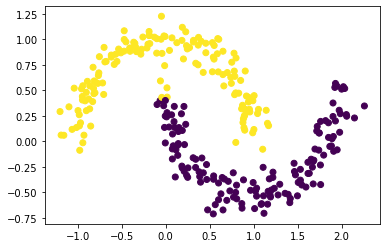

In [ ]:
dbscan2 = DBSCAN2(min_points=25, epsilon=0.34)
dbscan2.fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan2.clusters)

min samples:  11  epsilon:  0.24


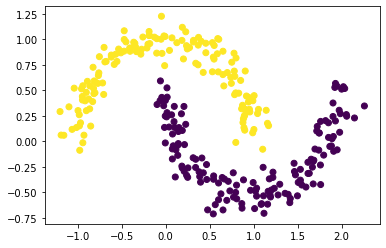

In [ ]:
from sklearn.metrics import accuracy_score
y_true2 = np.array([0 if i == 1 else 1 for i in y_true ])

accur = 0
min = 0
epsilon = 0
for i in range(5, 38):
  for j in range(1,41):
    dbscan = DBSCAN(min_samples=i, eps=j*0.02)
    dbscan.fit(X)
    if(sum(y_true2 == dbscan.labels_) > accur):
      accur = sum(y_true2 == dbscan.labels_)
      min = i
      epsilon = j*0.02

dbscan = DBSCAN(min_samples=min, eps=epsilon)
dbscan.fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
print("min samples: ", min, " epsilon: ", epsilon)

## Optional Task: Try it on other types of data

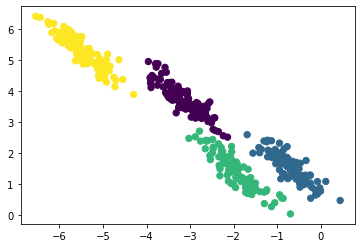

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
X = X_stretched
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')

In [ ]:
y_true

array([3, 2, 2, 0, 2, 3, 1, 0, 2, 1, 3, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       3, 0, 0, 3, 3, 0, 0, 1, 0, 0, 2, 0, 2, 3, 1, 0, 1, 0, 2, 3, 1, 0,
       1, 3, 1, 1, 1, 3, 3, 3, 2, 3, 3, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2,
       1, 0, 2, 3, 2, 0, 2, 3, 1, 2, 0, 2, 3, 2, 2, 0, 1, 3, 0, 2, 2, 0,
       2, 1, 2, 1, 0, 2, 2, 3, 0, 1, 1, 1, 3, 1, 0, 0, 2, 3, 0, 3, 1, 2,
       2, 2, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 3, 0, 3, 1, 1, 1, 0, 3, 3,
       3, 2, 0, 2, 3, 0, 3, 2, 0, 2, 2, 3, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0,
       3, 2, 1, 2, 2, 2, 0, 2, 3, 2, 2, 3, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1,
       0, 2, 0, 3, 0, 3, 2, 0, 3, 2, 3, 0, 0, 3, 0, 0, 3, 2, 3, 3, 3, 1,
       1, 0, 0, 2, 1, 1, 3, 0, 2, 3, 0, 3, 0, 0, 1, 1, 3, 1, 0, 3, 1, 3,
       2, 0, 3, 2, 2, 2, 1, 3, 0, 3, 0, 2, 0, 0, 3, 1, 2, 1, 0, 2, 1, 0,
       0, 3, 1, 0, 3, 0, 1, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 3, 0, 2, 2, 2,
       3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3,
       1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 3,

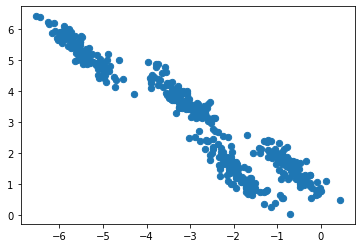

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')

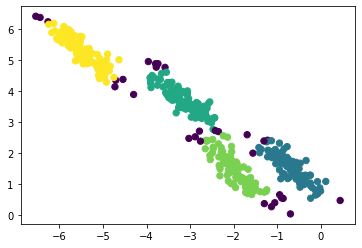

In [ ]:
db = DBSCAN2(min_points=11, epsilon=0.3)
db.fit(X)
plt.scatter(X[:,0], X[:,1], c=db.clusters, s=40, cmap='viridis')

In [ ]:
db.clusters

array([ 4.,  3.,  3.,  2.,  3.,  4.,  1.,  2.,  3.,  1.,  4.,  1.,  2.,
        3.,  3.,  1., -1.,  1.,  2.,  3.,  3.,  3.,  4.,  2.,  2.,  4.,
        4., -1.,  2.,  1.,  2.,  2.,  3.,  2., -1.,  4.,  1.,  2.,  1.,
        2.,  3.,  4.,  1.,  2.,  1.,  4.,  1.,  1.,  1.,  4.,  4.,  4.,
        3.,  4.,  4., -1.,  2.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  2.,
        3.,  1.,  2.,  3.,  4.,  3.,  2.,  3.,  4., -1.,  3.,  3.,  3.,
       -1.,  3.,  3.,  2.,  1.,  4., -1.,  3.,  3.,  2.,  3.,  1.,  3.,
        1.,  2.,  3., -1.,  4.,  2.,  1.,  1.,  1.,  4.,  1.,  2.,  2.,
        3.,  4.,  2.,  4.,  1.,  3.,  3.,  3.,  2.,  3.,  4.,  1.,  4.,
        3.,  4.,  4., -1.,  3.,  1.,  4.,  2.,  4.,  1.,  1.,  1.,  2.,
        4.,  4.,  4.,  3.,  2.,  3.,  4.,  2.,  4.,  3.,  2.,  3., -1.,
        4.,  3.,  1.,  2.,  3.,  1.,  3.,  1.,  2.,  1.,  2.,  4.,  3.,
        1.,  3.,  3.,  3.,  2., -1.,  4.,  3.,  3.,  4.,  1.,  1.,  3.,
        4.,  4., -1., -1.,  1.,  1.,  1.,  2.,  3.,  2.,  4.,  2

min samples:  16  epsilon:  0.38


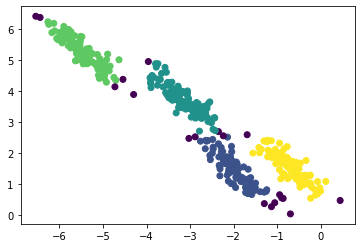

In [ ]:
from sklearn.metrics import accuracy_score
list=[]
for i in y_true:
  if i == 1:
    list.append(3)
  elif i == 2:
    list.append(2)
  elif i == 3:
    list.append(1)
  else:
    list.append(4)


y_true2 = np.array([3 if i == 1 else 1 for i in y_true ])

accur = 0
min = 0
epsilon = 0
for i in range(10, 21):
  for j in range(1,21):
    dbscan = DBSCAN(min_samples=i, eps=j*0.02)
    dbscan.fit(X)
    if(sum(y_true2 == dbscan.labels_) > accur):
      accur = sum(y_true2 == dbscan.labels_)
      min = i
      epsilon = j*0.02

dbscan = DBSCAN(min_samples=min, eps=epsilon)
dbscan.fit(X)
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
print("min samples: ", min, " epsilon: ", epsilon)